## Module 3 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class.

Before you attempt any of these activities, make sure to watch the video lectures for this module.

### Joining tables
Let's look at the spatial distribution of vaccine hesitancy, early in the pandemic.

The CDC has a dataset at the county level, [available via Socrata](https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw).


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Import the vaccine hesitancy dataset into a dataframe. Call it <strong>hesitancy</strong>.
</div>

*Hint*: Use the same approach as for the Seattle permits (class 2) or the Los Angeles housing (lecture 5). Just use a different URL.

*Hint*: Add the `limit` keyword at the end of the URL to get more than 1000 rows. [See the example here](https://github.com/socrata/discuss/issues/145). There are 3,142 rows, according to the dataset's webpage, so you will be safe if you specify a limit of (say) 5000 rows.

In [33]:
# your code here
import requests
import pandas as pd
import json

url = 'https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=5000'
r = requests.get(url)
#print(r.text)
hesitancy= pd.DataFrame(json.loads(r.text))
hesitancy.head()


,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,...,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,geographical_point,state_code,county_boundary,state_boundary,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.24,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0036,0.2697,0,0.6887,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.235,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0061,0.3237,0.0003,0.6263,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0003,0.6938,0,0.2684,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0025,0.2354,0,0.6495,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
4,1119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.139,0.96,Very High Vulnerability,0.96,Very High Concern,...,0.0214,0.7192,0,0.2481,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94


In [34]:
hesitancy.columns

Index(['fips_code', 'county_name', 'state', 'estimated_hesitant',
       'estimated_hesitant_or_unsure', 'estimated_strongly_hesitant',
       'social_vulnerability_index', 'svi_category',
       'ability_to_handle_a_covid', 'cvac_category', 'percent_adults_fully',
       'percent_hispanic', 'percent_non_hispanic_american',
       'percent_non_hispanic_asian', 'percent_non_hispanic_black',
       'percent_non_hispanic_native', 'percent_non_hispanic_white',
       'geographical_point', 'state_code', 'county_boundary', 'state_boundary',
       ':@computed_region_hjsp_umg2', ':@computed_region_skr5_azej'],
      dtype='object')

Before we do any joins, let's look at some state-level summary statistics.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create a dataframe with the state-level means of estimated_hesitant and the vaccination rate.
</div>

*Hints*:
- It might make more sense to weight each county by population, but let's not worry about that here.
- The `percent_adults_fully` columm gives the vaccination rate (as of June 2021)
- Use `groupby`!
- Before you do any operations, you might need to convert the data type of the column. I recommend creating a new column, e.g. `df['newcol'] = df.oldcol.astype(float)`

In [22]:
# Dataframe with state-level means of estimated_hesistant and vaccination rate
hesitancy[['percent_adults_fully', 'estimated_hesitant']] = hesistancy[['percent_adults_fully', 'estimated_hesitant']].astype(float)
hesitancy_vaccination=hesitancy.groupby('state')[['percent_adults_fully', 'estimated_hesitant']].mean()

In [26]:
hesitancy_vaccination.head()

,percent_adults_fully,estimated_hesitant
state,,
ALABAMA,0.320851,0.173507
ALASKA,0.582296,0.217386
ARIZONA,0.504733,0.159240
ARKANSAS,0.338800,0.212123
CALIFORNIA,0.506820,0.072274


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create a scatter plot of hesitancy vs vaccination rates.
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


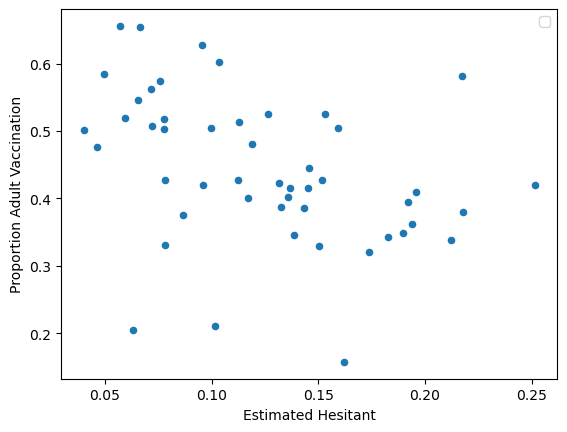

In [27]:
# Scatter plot of hesitancy vs vaccination rates
import matplotlib.pyplot as plt
hesitancy_vaccination.plot.scatter(x='estimated_hesitant', y='percent_adults_fully')
plt.xlabel('Estimated Hesitant')
plt.ylabel('Proportion Adult Vaccination')
plt.show()

## Joining
Now let's do a join.
It looks like the county boundaries are in our original dataframe, but in a weird format. We could try and parse them. But instead, let's get the county boundaries and total population using `cenpy`. 

We'll just do one state, in order to reduce the sizes of the files for this exercise.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Get a geodataframe of the county boundaries and population totals for a state of your choice, using cenpy.
</div>

*Hints*: 
* The `from_state`, rather than `from_county` will be helpful. See the [docs](http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.from_state.html). 
* You'll need to specify the state (e.g. "California") and the level (use "county").
* A small state will download faster!
* The population variable is B01001_001E

In [31]:
import cenpy
from cenpy import products
acs = cenpy.products.ACS()

censusDf = products.ACS(2017).from_state('Rhode Island', level='county',
                                        variables='B01001_001E') # replace with your code
censusDf.head()

/Users/clairebekker/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:767: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(state, variables, level, "States", **kwargs)


,GEOID,geometry,B01001_001E,NAME,state,county
0,44001,"POLYGON ((-7940305.290 5113155.330, -7940527.2...",49028.0,"Bristol County, Rhode Island",44,001
1,44005,"POLYGON ((-7950649.430 5078796.650, -7950134.0...",83204.0,"Newport County, Rhode Island",44,005
2,44007,"POLYGON ((-7992147.220 5139195.510, -7992172.3...",633704.0,"Providence County, Rhode Island",44,007
3,44009,"MULTIPOLYGON (((-7961840.380 5101630.430, -796...",126190.0,"Washington County, Rhode Island",44,009
4,44003,"POLYGON ((-7957552.460 5120859.280, -7957519.9...",164012.0,"Kent County, Rhode Island",44,003


You should have a `GEOID` column in your `censusDf`, as well as a geometry column.


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Join the covid dataframe to your census dataframe.</div>

*Hints:*:
* Look at which column gives the county FIPS code in each dataframe.
* Do the data types match? Anything else you need to clean up before joining?
* It might be helpful to do a left join from the census dataframe. That means that you will automatically drop the data for counties in other states.

In [36]:
# Set index for hesitancy and censusDf as the variable to join on
hesitancy.set_index('fips_code', inplace=True)
censusDf.set_index('GEOID', inplace=True)

In [38]:
# Join covid dataframe to census dataframe
joinedDF= censusDf.join(hesitancy, rsuffix='hesitant')
joinedDF.head()

,geometry,B01001_001E,NAME,state,county,county_name,statehesitant,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,...,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,geographical_point,state_code,county_boundary,state_boundary,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej
GEOID,,,,,,,,,,,,,,,,,,,,,
44001,"POLYGON ((-7940305.290 5113155.330, -7940527.2...",49028.0,"Bristol County, Rhode Island",44,001,"Bristol County, Rhode Island",RHODE ISLAND,0.0628,0.0828,0.0475,...,0.0206,0.0126,0,0.9142,"{'type': 'Point', 'coordinates': [-71.534637, ...",RI,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",27,2703
44005,"POLYGON ((-7950649.430 5078796.650, -7950134.0...",83204.0,"Newport County, Rhode Island",44,005,"Newport County, Rhode Island",RHODE ISLAND,0.0628,0.0828,0.0475,...,0.0195,0.035,0.0009,0.8577,"{'type': 'Point', 'coordinates': [-71.534637, ...",RI,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",27,2703
44007,"POLYGON ((-7992147.220 5139195.510, -7992172.3...",633704.0,"Providence County, Rhode Island",44,007,"Providence County, Rhode Island",RHODE ISLAND,0.0724,0.0999,0.0535,...,0.0408,0.0829,0.0008,0.6079,"{'type': 'Point', 'coordinates': [-71.534637, ...",RI,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",27,2703
44009,"MULTIPOLYGON (((-7961840.380 5101630.430, -796...",126190.0,"Washington County, Rhode Island",44,009,"Washington County, Rhode Island",RHODE ISLAND,0.0628,0.0826,0.0474,...,0.0191,0.0126,0.0008,0.9092,"{'type': 'Point', 'coordinates': [-71.534637, ...",RI,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",27,2703
44003,"POLYGON ((-7957552.460 5120859.280, -7957519.9...",164012.0,"Kent County, Rhode Island",44,003,"Kent County, Rhode Island",RHODE ISLAND,0.0713,0.0934,0.0529,...,0.0271,0.0161,0,0.8833,"{'type': 'Point', 'coordinates': [-71.534637, ...",RI,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",27,2703


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create some county-level maps and other simple analyses.
</div>

The [geopandas documentation](https://geopandas.org/en/stable/docs/user_guide/mapping.html) has some useful tips.

Hint: make sure your column is numeric before you plot it!

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<h3>What you should have learned</h3>
<ul>
  <li>Gain more practice with the APIs</li>
  <li>Understand basic data cleaning operations, such as converting strings to numeric fields.</li>
  <li>Understand how to compute group-level means and other summary statistics.</li>
    <li>Understand how to join tables on a common column.</li>
</ul>
</div>